# 无监督聚类算法实验报告

吴雅妃 2210515003；房美贤 2210515014

<a id='5'></a>
# 1. 加载wine数据集

In [2]:
# 导入包
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [3]:

wine = datasets.load_wine()
X = wine.data
y = wine.target

<a id='5'></a>
# 2. 数据预处理

In [4]:

# a. 数据清洗（这里wine数据集已经很干净，无需清洗）
# b. 缺失值处理（wine数据集没有缺失值）
# c. 特征缩放
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 基于距离的聚类（K-means）

### a. 使用K-means聚类算法

In [5]:
# 导入相关库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 加载wine数据集
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data # 特征矩阵
y = wine.target # 真实标签

# 标准化数据
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




### b. 需要确定合适的聚类数目，可以尝试不同的聚类数目并评估结果
### c. 应使用适当的评估指标，例如轮廓系数，对聚类结果进行评估

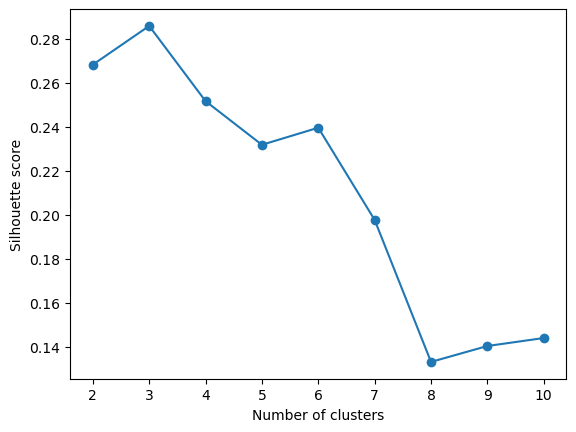

The best number of clusters is 3


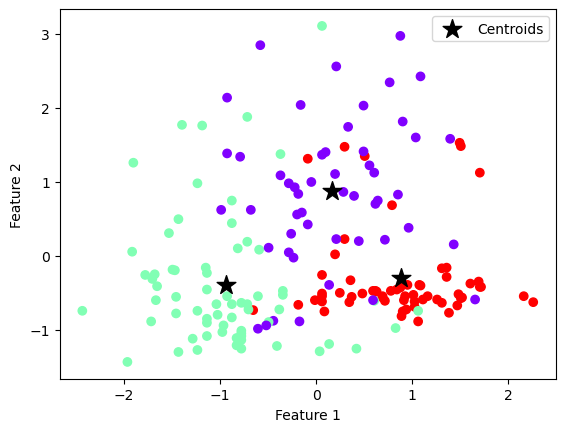

In [6]:
k_range = range(2, 11) # 聚类数目从2到10
scores = [] # 存储轮廓系数
for k in k_range:
    # 创建KMeans对象，并进行聚类
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    # 获取聚类标签
    labels = kmeans.labels_
    # 计算轮廓系数
    score = silhouette_score(X_scaled, labels)
    scores.append(score)

# 绘制聚类数目与轮廓系数的关系图
plt.plot(k_range, scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# 选择最佳的聚类数目，根据轮廓系数的最大值
best_k = k_range[np.argmax(scores)]
print('The best number of clusters is', best_k)

# 使用最佳的聚类数目，重新进行聚类，并展示结果
kmeans = KMeans(n_clusters=best_k, random_state=0)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 绘制聚类结果，以第一和第二个特征为例
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


# 4、基于密度的聚类（DBSCAN）：

### a. 使用DBSCAN聚类算法，根据给定的数据集，将数据点分为核心点、边界点和噪声点；

在DBSCAN聚类算法中，距离阈值（eps）和最小样本数（min_samples）是两个重要的超参数，它们决定了一个样本是否被认为是核心点或噪声点，以及簇的形成和扩展1。不同的参数组合会导致不同的聚类结果，因此需要根据数据的特征和目标来选择合适的参数值。
对于eps值的确定，一种常用的方法是绘制k-距离图，即对每个样本，计算它与最近的k个邻居的平均距离，并按升序排列，然后观察图中的拐点（knee），即距离突然增大的位置2。这个拐点可以作为eps的参考值，因为它表示了簇内和簇间距离的变化。min_samples的值可以根据数据集的大小和密度来确定，一般来说，值越大，簇越少，噪声越多1。

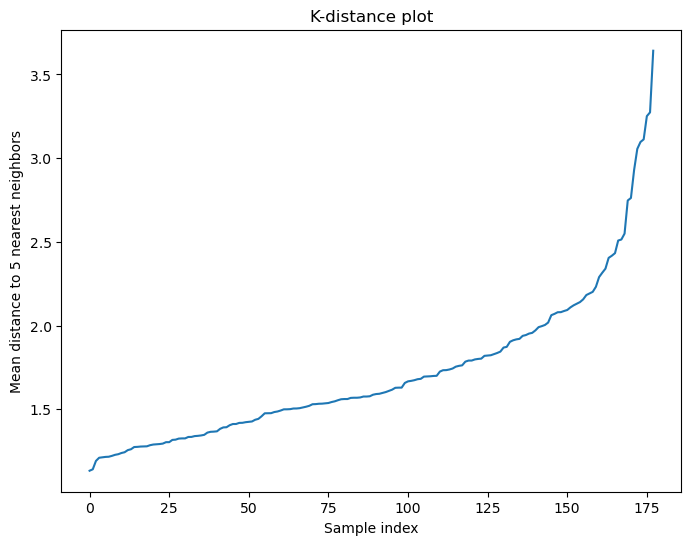

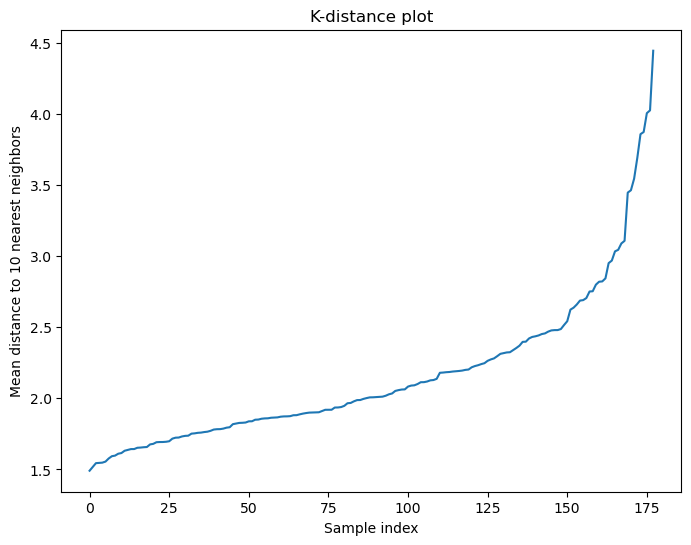

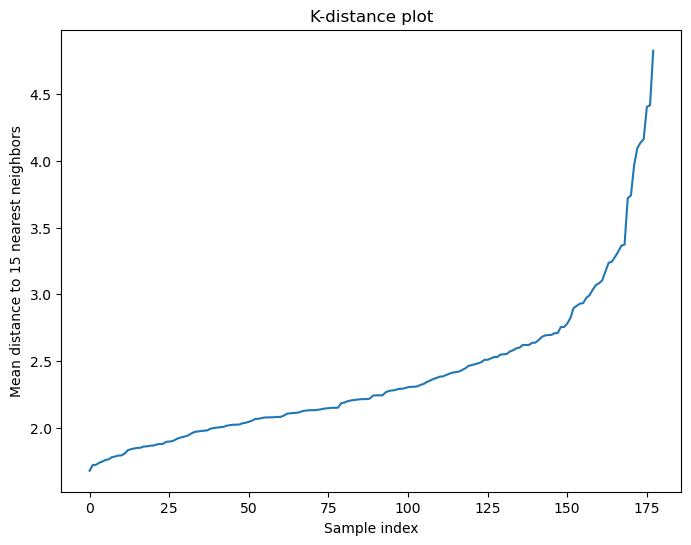

In [7]:
# 导入所需的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
# 定义一个函数，用于绘制k-距离图
def k_distance_plot(X, k):
    # 创建一个最近邻模型，使用欧式距离
    nbrs = NearestNeighbors(n_neighbors=k, metric='euclidean')
    # 对数据进行拟合
    nbrs.fit(X)
    # 获取每个样本与最近的k个邻居的距离和索引
    distances, indices = nbrs.kneighbors(X)
    # 计算每个样本与最近的k个邻居的平均距离
    mean_distances = np.mean(distances, axis=1)
    # 按升序排列平均距离
    sorted_distances = np.sort(mean_distances)
    # 绘制k-距离图，横轴为样本索引，纵轴为平均距离
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_distances)
    plt.xlabel('Sample index')
    plt.ylabel('Mean distance to %d nearest neighbors' % k)
    plt.title('K-distance plot')
    plt.show()

# 尝试不同的k值，并绘制k-距离图

# k=5
k_distance_plot(X_scaled, k=5)

# k=10
k_distance_plot(X_scaled, k=10)

# k=15
k_distance_plot(X_scaled, k=15)


观察可见，eps参数在2.5-3之间

### a. 使用DBSCAN聚类算法，根据给定的数据集，将数据点分为核心点、边界点和噪声点；
### b. 选择不同的距离阈值和最小样本数，并观察对聚类结果的影响；
### c. 使用适当的评估指标，例如紧密度和分离度，对聚类结果进行评估。

In [8]:
# 定义一个函数，用于计算聚类结果的紧密度和分离度
def density_and_separation(X, labels):
    # 获取簇的个数和样本的个数
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_samples = len(X)

    # 初始化紧密度和分离度为0
    density = 0
    separation = 0

    # 遍历每个簇
    for k in range(n_clusters):
        # 获取当前簇的样本索引和样本个数
        cluster_mask = (labels == k)
        cluster_size = np.sum(cluster_mask)

        # 计算当前簇内的平均距离作为紧密度的一部分
        cluster_density = np.sum(np.linalg.norm(X[cluster_mask] - np.mean(X[cluster_mask], axis=0), axis=1)) / cluster_size

        # 计算当前簇与其他簇之间的平均距离作为分离度的一部分
        cluster_separation = np.sum(np.linalg.norm(np.mean(X[cluster_mask], axis=0) - np.mean(X[~cluster_mask], axis=0))) / (n_clusters - 1)

        # 累加紧密度和分离度，并考虑簇的权重（样本占比）
        density += cluster_density * cluster_size / n_samples
        separation += cluster_separation * cluster_size / n_samples

    # 返回紧密度和分离度
    return density, separation

def dbscan_cluster(eps, min_samples):
    # 使用DBSCAN聚类算法对数据进行聚类
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)
    # 使用轮廓系数对聚类结果进行评估，轮廓系数越接近1表示聚类效果越好，越接近-1表示聚类效果越差
    score = silhouette_score(X_scaled, labels)
    print('轮廓系数: ','%.3f' % score)
    # 使用紧密度和分离度对聚类结果进行评估，紧密度越小表示簇内距离越小，分离度越大表示簇间距离越大
    density, separation = density_and_separation(X_scaled, labels)
    print('紧密度: ','%.3f' % density)
    print('分离度: ','%.3f' % separation)
    # 获取核心点、边界点和噪声点的索引
    core_mask = np.zeros_like(labels, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    border_mask = ~core_mask & (labels != -1)
    noise_mask = (labels == -1)

    # 绘制聚类结果的散点图，不同的簇用不同的颜色表示，核心点用实心圆表示，边界点用空心圆表示，噪声点用叉号表示
    # 由于数据有13个特征，无法直接可视化，所以只选择前两个特征作为横纵坐标
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # 噪声点用黑色表示
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        # 绘制核心点
        xy = X_scaled[class_member_mask & core_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

        # 绘制边界点
        xy = X_scaled[class_member_mask & border_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

        # 绘制噪声点
        xy = X_scaled[class_member_mask & noise_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'x', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % len(unique_labels))
    plt.xlabel('Alcohol')
    plt.ylabel('Malic acid')
    plt.show()

    


eps= 2.5 ,min_samples= 5
轮廓系数:  0.135
紧密度:  2.914
分离度:  inf


C:\Users\DELL\AppData\Local\Temp\ipykernel_18036\462434568.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  cluster_separation = np.sum(np.linalg.norm(np.mean(X[cluster_mask], axis=0) - np.mean(X[~cluster_mask], axis=0))) / (n_clusters - 1)


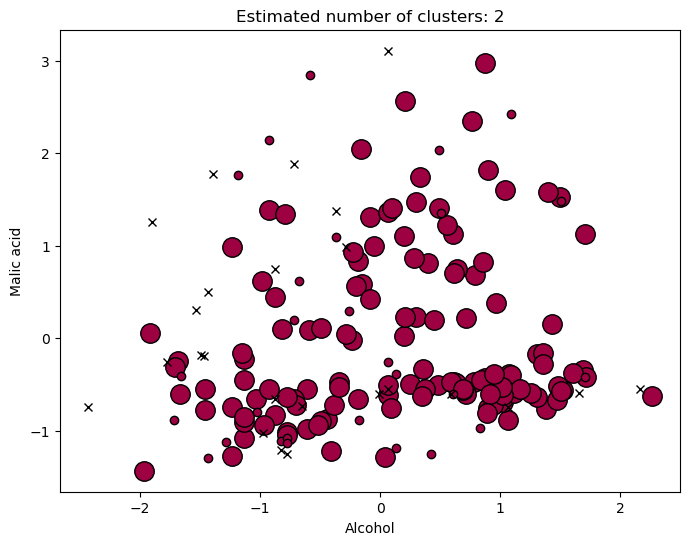

eps= 2.5 ,min_samples= 10
轮廓系数:  0.204
紧密度:  2.202
分离度:  2.694


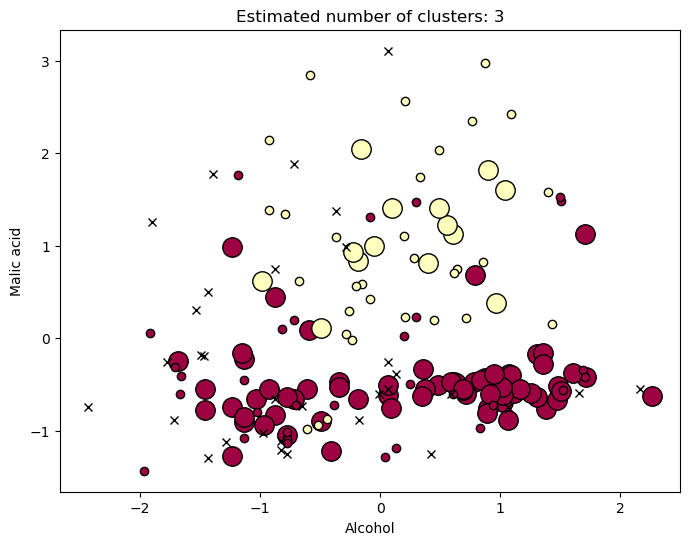

eps= 2.5 ,min_samples= 15
轮廓系数:  0.154
紧密度:  1.867
分离度:  2.225


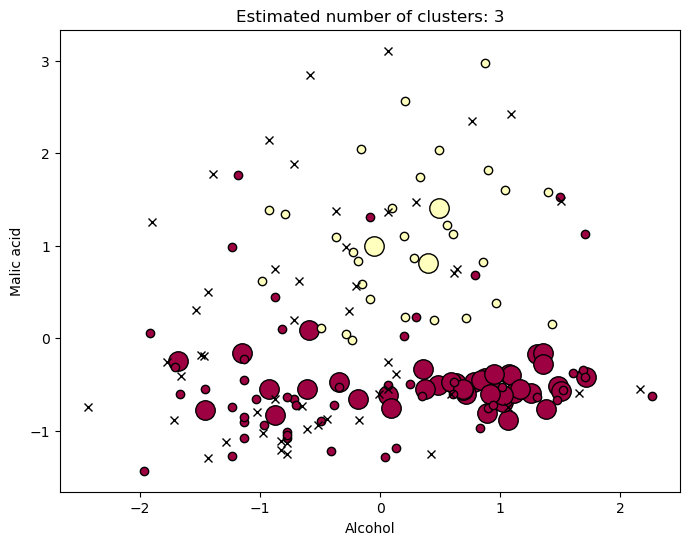

eps= 3 ,min_samples= 5
轮廓系数:  0.218
紧密度:  3.197
分离度:  inf


C:\Users\DELL\AppData\Local\Temp\ipykernel_18036\462434568.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  cluster_separation = np.sum(np.linalg.norm(np.mean(X[cluster_mask], axis=0) - np.mean(X[~cluster_mask], axis=0))) / (n_clusters - 1)


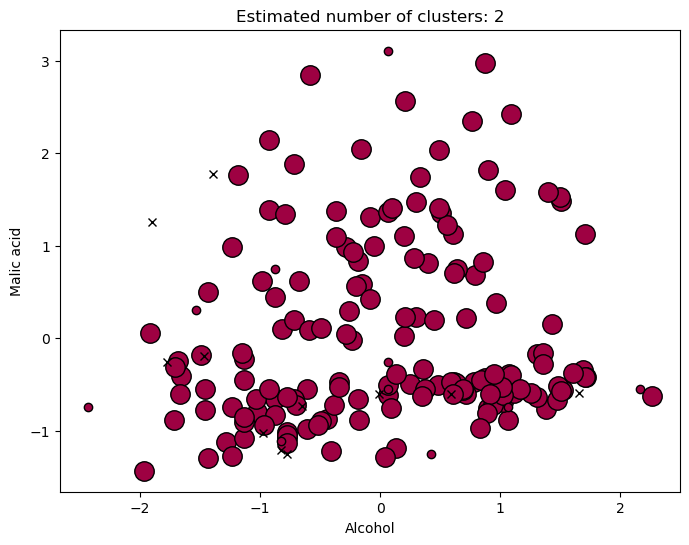

eps= 3 ,min_samples= 10
轮廓系数:  0.202
紧密度:  3.178
分离度:  inf


C:\Users\DELL\AppData\Local\Temp\ipykernel_18036\462434568.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  cluster_separation = np.sum(np.linalg.norm(np.mean(X[cluster_mask], axis=0) - np.mean(X[~cluster_mask], axis=0))) / (n_clusters - 1)


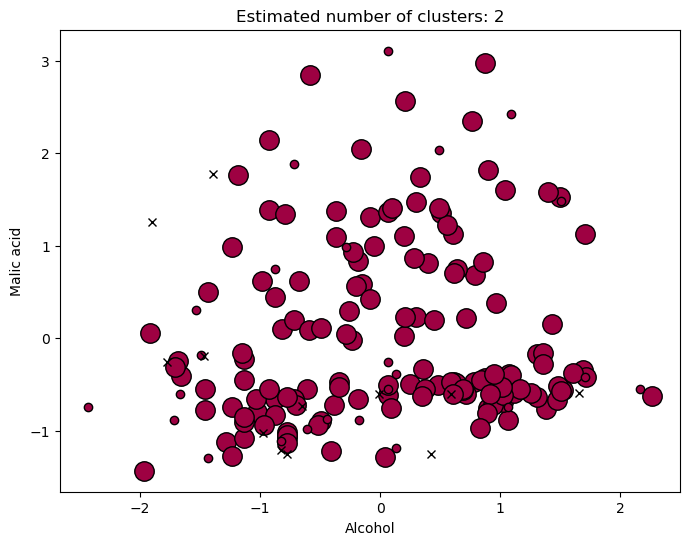

eps= 3 ,min_samples= 15
轮廓系数:  0.194
紧密度:  3.155
分离度:  inf


C:\Users\DELL\AppData\Local\Temp\ipykernel_18036\462434568.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  cluster_separation = np.sum(np.linalg.norm(np.mean(X[cluster_mask], axis=0) - np.mean(X[~cluster_mask], axis=0))) / (n_clusters - 1)


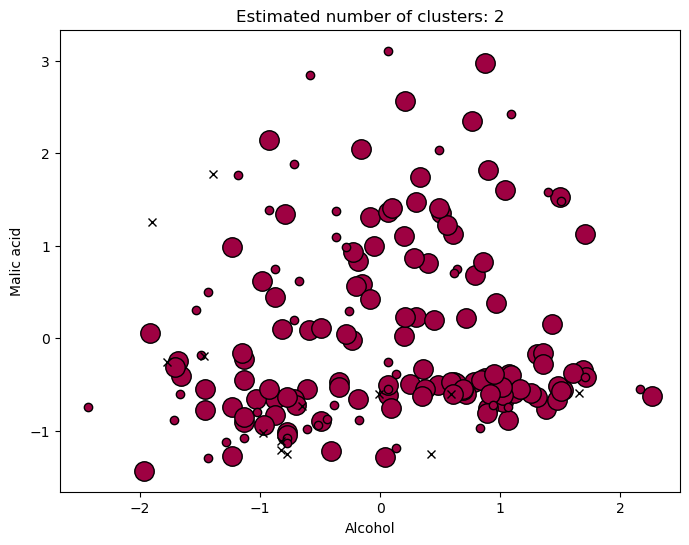

In [9]:
# 定义两个列表，分别存储不同的eps和min_samples值
eps_list = [2.5, 3]
min_samples_list = [5, 10, 15]

# 使用嵌套循环来遍历不同的参数组合
for eps in eps_list:
    for min_samples in min_samples_list:
        print("eps=",eps,",min_samples=",min_samples)
        # 调用dbscan_cluster函数，并获取返回的轮廓系数
        dbscan_cluster(eps, min_samples)


结合紧密度和分离度以及输出的图进行评估，聚类结果最好的参数组合应是（eps= 2.5 ,min_samples= 10），此时轮廓系数为0.204，紧密度为2.202，分离度为2.694

# 5、基于层次的聚类：

### a. 使用层次聚类算法，可以选择自上而下（凝聚型）或自下而上（分裂型）的方法。
### b. 根据合适的聚类停止条件，生成聚类树或聚类簇。
### c. 使用适当的可视化方法，如树状图或热图，展示聚类结果。

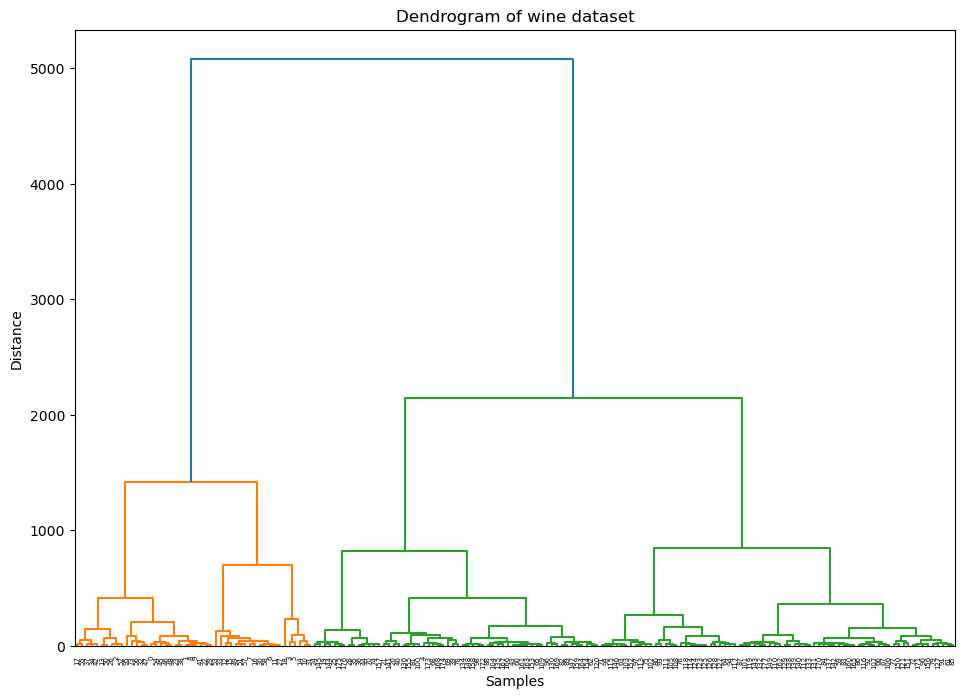

In [37]:
# 导入所需的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
# 凝聚型层次聚类模型，使用欧氏距离和ward连接方式，并且根据之前的聚类结果，将簇的数量预设为3
agg = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
# 对数据进行聚类，得到标签
hier_labels = agg.fit_predict(X)
Z=linkage(X,method="ward")
# 绘制树状图和热图，展示聚类结果
plt.figure(figsize=(25, 8))
plt.subplot(121)
dendrogram(Z)
plt.title("Dendrogram of wine dataset")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


# 6、结果评估与比较：

### a. 使用适当的聚类评估指标，如轮廓系数、兰德系数等，对三种聚类方法的结果进行评估。
### b. 比较并分析不同方法在数据集上的聚类效果和性能。
### c. 可以通过绘制聚类结果的可视化图表，比较不同方法之间的差异和特点。

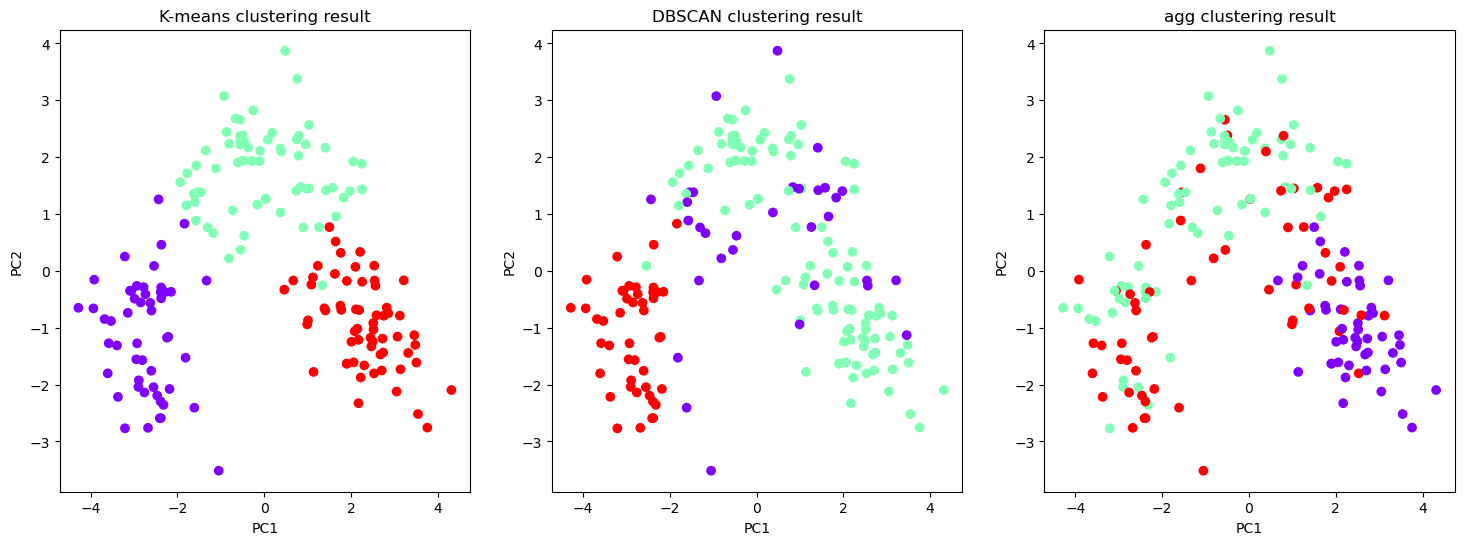

In [38]:
# 导入所需的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
# 使用K-means聚类算法，设置簇的个数为2，生成聚类簇
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_

# 使用DBSCAN聚类算法，设置邻域半径为2.5，最小样本数为10，生成聚类簇
dbscan = DBSCAN(eps=2.5, min_samples=10)
dbscan.fit(X_scaled)
dbscan_labels = dbscan.labels_

# 凝聚型层次聚类模型，使用欧氏距离和ward连接方式
agg = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
# 对数据进行聚类，得到标签
hier_labels = agg.fit_predict(X)

# 绘制三种聚类方法的结果的可视化图表，比较不同方法之间的差异和特点
plt.figure(figsize=(18, 6))
plt.subplot(131)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap="rainbow")
plt.title("K-means clustering result")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.subplot(132)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap="rainbow")
plt.title("DBSCAN clustering result")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.subplot(133)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hier_labels, cmap="rainbow")
plt.title("agg clustering result")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()



轮廓系数（silhouette score）是一种评估聚类结果的指标，它考虑了每个样本与其所属簇内其他样本的平均距离（a）和与最近的其他簇的平均距离（b），并计算出(b-a)/max(a,b)的平均值。轮廓系数的取值范围是[-1,1]，越接近1表示聚类效果越好，越接近-1表示聚类效果越差，接近0表示簇有重叠。

Rand指数（rand score）是一种衡量两个数据聚类相似度的指标，它考虑了所有样本对，并统计在预测聚类和真实聚类中同属于一个簇或不同簇的样本对的比例。Rand指数的取值范围是[0,1]，越接近1表示聚类效果越好，越接近0表示聚类效果越差。

K-means: silhouette score = 0.28594199657074876 , rand score = 0.9148795960669529
DBSCAN: silhouette score = 0.20438854495188735 , rand score = 0.42354907037688627
Hierarchical: silhouette score = 0.10633587615177803 , rand score = 0.36840191587483156


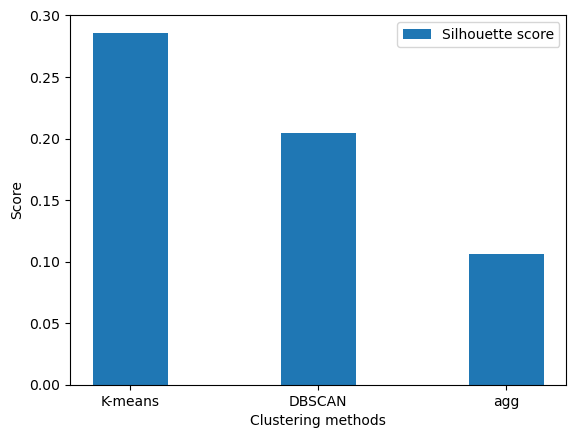

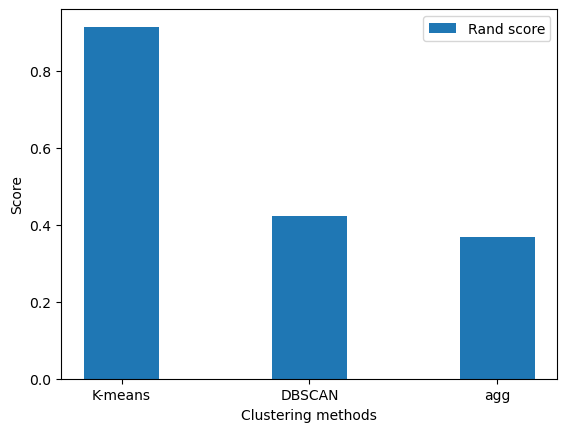

In [39]:

# 使用轮廓系数和兰德系数对三种聚类方法的结果进行评估
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_rand = adjusted_rand_score(y, kmeans_labels)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
dbscan_rand = adjusted_rand_score(y, dbscan_labels)
hier_silhouette = silhouette_score(X_scaled, hier_labels)
hier_rand = adjusted_rand_score(y, hier_labels)
# 打印评估指标的结果
print("K-means: silhouette score =", kmeans_silhouette, ", rand score =", kmeans_rand)
print("DBSCAN: silhouette score =", dbscan_silhouette, ", rand score =", dbscan_rand)
print("Hierarchical: silhouette score =", hier_silhouette, ", rand score =", hier_rand)
#计算三种聚类方法的轮廓系数和Rand指数
sil_scores = [] # 存储轮廓系数
rand_scores = [] # 存储Rand指数

sil_scores.append(silhouette_score(X_scaled, kmeans_labels)) # 计算k-means聚类的轮廓系数
rand_scores.append(adjusted_rand_score(y, kmeans_labels)) # 计算k-means聚类的Rand指数
sil_scores.append(silhouette_score(X_scaled, dbscan_labels)) # 计算DBSCAN聚类的轮廓系数
rand_scores.append(adjusted_rand_score(y, dbscan_labels)) # 计算DBSCAN聚类的Rand指数
sil_scores.append(silhouette_score(X_scaled, hier_labels)) # 计算层次聚类的轮廓系数
rand_scores.append(adjusted_rand_score(y, hier_labels)) # 计算层次聚类的Rand指数


# 绘制三种聚类方法的轮廓系数和Rand指数结果的可视化图表
methods = ['K-means', 'DBSCAN',"agg"] # 聚类方法名称
plt.bar(methods, sil_scores, width=0.4, label='Silhouette score')
plt.xlabel('Clustering methods')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.bar(methods, rand_scores, width=0.4, label='Rand score')
plt.xlabel('Clustering methods')
plt.ylabel('Score')
plt.legend()
plt.show()

对比以上三种聚类结果的可视化图表，可见k-means聚类在本实验中表现最好。

### d. 进一步讨论每种方法的优缺点、适用场景以及改进方法。

### k-means聚类
#### 优点
实现简单，理解容易，只需要指定簇数k和距离度量。

计算效率高，可以处理大规模的数据集，可以并行化或分布式。

灵活适应，可以处理不同类型的数据和距离度量，可以与其他方法或技术结合。

稳健鲁棒，可以处理异常值和噪声，产生一致的结果。

#### 缺点
需要手动选择簇数k，不同的k值可能导致不同的结果，难以确定最优的k值。

依赖于初始质心的选择，不同的随机种子可能导致收敛到不同的局部最优而非全局最优。

假设簇是球形的且具有相似的方差，不适合处理复杂或不规则的簇。

对数据的尺度和分布敏感，需要进行标准化或归一化处理。

#### 适用场景
数据量较大，特征维度较低，簇形状较为规则且大小相似。

数据分布较为均匀，没有明显的异常值或噪声。

对聚类结果的精度要求不太高，可以接受一定程度的误差。

#### 改进方法
使用轮廓系数、肘部法则、信息准则等方法来选择合适的k值。

使用k-means++、k-means||等算法来选择初始质心，提高收敛速度和质量。

使用核函数、谱聚类等方法来处理非线性可分或非球形的簇。

使用PCA等方法来降低数据维度，减少计算复杂度和噪声干扰。

### DBSCAN聚类
是基于密度的聚类算法，它将密度高的区域划分为簇，而将密度低的区域视为噪声或异常点。DBSCAN不需要预先指定簇的个数，也不假设簇的形状是球形的，因此可以处理任意形状的数据集。DBSCAN的主要参数是eps（邻域半径）和min_samples（邻域内最小数据点数），它们决定了一个点是否是核心点、边界点或噪声点。
#### 优点
能够识别和排除噪声点

对异常值不敏感

聚类结果没有偏倚

#### 缺点
运行速度较慢

难以在不同密度的数据中识别簇

对高维数据效果不佳

对参数选择敏感

#### 适用场景
适用于数据集中有明显的密度差异，且簇的形状不规则，需要排除噪声点的情况

例如，在空间数据分析、图像分割、异常检测等领域有广泛的应用

#### 改进方法
OPTICS（基于排序点的图像系统聚类）可以解决不同密度区域的聚类问题

DENCLUE（基于密度分布函数的聚类）可以解决高维数据和噪声敏感问题

ST-DBSCAN（基于空间和时间邻域扩展性密度聚类）可以解决时空数据的聚类问题。

### 层次聚类
层次聚类是基于距离或相似度的聚类算法，它将数据点按照层次结构进行聚合或分割，形成一棵树状图（dendrogram）。层次聚类有两种主要方法：凝聚法（自下而上）和分裂法（自上而下）。凝聚法是从每个数据点作为一个簇开始，然后逐渐合并最近的簇，直到达到预定的簇数或停止条件。分裂法是从所有数据点作为一个簇开始，然后逐渐划分最远的簇，直到达到预定的簇数或停止条件。

#### 优点
不需要预先指定簇的个数

可以通过树状图直观地展示数据的层次结构

可以选择不同的距离或相似度度量和合并或划分准则

#### 缺点
运行速度较慢

占用内存较多

一旦合并或划分后不能进行调整

#### 适用场景
数据集中有明显的层次结构，且需要根据不同的距离或相似度度量和合并或划分准则进行灵活的聚类的情况

例如，在生物信息学、社会网络分析、文本挖掘等领域有广泛的应用

#### 改进方法
BIRCH（平衡迭代规约和聚类）可以解决大规模数据集的聚类问题

CURE（代表点聚类）可以解决非球形簇和噪声敏感问题

ROCK（基于链接的聚类）可以解决离散属性数据的聚类问题。